In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [3]:
all_files = glob.glob('myCabinetExcelData*.xls')
all_files

['myCabinetExcelData (1).xls', 'myCabinetExcelData.xls']

In [4]:
all_files_data = [] #저장할 리스트 
for file in all_files:  
    data_frame = pd.read_excel(file)    
    all_files_data.append(data_frame) 
all_files_data[0] #작업 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Call for Special Issue Papers: Soft Computing ...,"Chilamkurti, Naveen; Paul, Anand; Kumar, Akshi",Mary Ann Leibert,2020
1,NaN,2,Atmospheric and ecosystem big data providing k...,"Kulmala, Markku; Lintunen, Anna; Ylivinkka, Il...",John Wiley & Sons Ltd,2021
2,NaN,3,Earth observation and geospatial big data mana...,"Mihály, Szabolcs; Remetey-Fülöpp, Gábor; Krist...",John Wiley & Sons Ltd,2021
3,NaN,4,RST-DE: Rough Sets-Based New Differential Evol...,"Thakur, Santosh; Dharavath, Ramesh; Shankar, A...",Mary Ann Leibert,2022
4,NaN,5,Furthest-Pair-Based Binary Search Tree for Spe...,"Hassanat, A. B. A.",Mary Ann Leibert,2018
...,...,...,...,...,...,...
95,NaN,96,A platform for big data analytics on distribut...,"Aye, Kyar Nyo; Thein, Thandar",Inderscience,2015
96,NaN,97,Classification and comparison of NoSQL big dat...,"Sharma, Sugam; Tim, Udoyara Sunday; Gadia, Sha...",Inderscience,2015
97,NaN,98,Kvasir: Scalable Provision of Semantically Rel...,"Wang, L.; Tasoulis, S.; Roos, T.; Kangasharju, J.",unknown,2016
98,NaN,99,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017


In [5]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True) 
all_files_data_concat    #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Call for Special Issue Papers: Soft Computing ...,"Chilamkurti, Naveen; Paul, Anand; Kumar, Akshi",Mary Ann Leibert,2020
1,NaN,2,Atmospheric and ecosystem big data providing k...,"Kulmala, Markku; Lintunen, Anna; Ylivinkka, Il...",John Wiley & Sons Ltd,2021
2,NaN,3,Earth observation and geospatial big data mana...,"Mihály, Szabolcs; Remetey-Fülöpp, Gábor; Krist...",John Wiley & Sons Ltd,2021
3,NaN,4,RST-DE: Rough Sets-Based New Differential Evol...,"Thakur, Santosh; Dharavath, Ramesh; Shankar, A...",Mary Ann Leibert,2022
4,NaN,5,Furthest-Pair-Based Binary Search Tree for Spe...,"Hassanat, A. B. A.",Mary Ann Leibert,2018
...,...,...,...,...,...,...
195,NaN,96,Call for Special Issue Papers: Big Scientific ...,"Anaraki, Farhad Pourkamali; Hariri-Ardebili, M...",Mary Ann Leibert,2021
196,NaN,97,A Survey of Biological Data in a Big Data Pers...,"Dall'Alba, Gabriel; Casa, Pedro Lenz; Abreu, F...",Mary Ann Leibert,2022
197,NaN,98,Call for Special Issue Papers: Soft Computing ...,"Chilamkurti, Naveen; Paul, Anand; Kumar, Akshi",Mary Ann Leibert,2020
198,NaN,99,Moth-Flame Optimization-Bat Optimization: Map-...,"Ravuri, Vasavi; Vasundra, S.",Mary Ann Leibert,2020


In [6]:
all_title = all_files_data_concat['제목'] 
all_title 

0      Call for Special Issue Papers: Soft Computing ...
1      Atmospheric and ecosystem big data providing k...
2      Earth observation and geospatial big data mana...
3      RST-DE: Rough Sets-Based New Differential Evol...
4      Furthest-Pair-Based Binary Search Tree for Spe...
                             ...                        
195    Call for Special Issue Papers: Big Scientific ...
196    A Survey of Biological Data in a Big Data Pers...
197    Call for Special Issue Papers: Soft Computing ...
198    Moth-Flame Optimization-Bat Optimization: Map-...
199    Call for Papers: Special Issue on Computationa...
Name: 제목, Length: 200, dtype: object

# 정규화

In [7]:
import nltk
nltk.download('popular')


stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Flora\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Flora\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Flora\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Flora\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Flora\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

In [8]:
words = [] 

for title in all_title: 
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) # 특스문자 삭제  / 저 영어가 아닌것들은 다 공백으로 처리하겠다
    EnWordsToken = word_tokenize(EnWords.lower()) #소문자화
    EnWordsTokenStop = [w for w in EnWordsToken if w not in #문장이 단어별로 쪼개져서 토큰으로 들어옴
                                   stopWords] 
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in 
                                            EnWordsTokenStop]         
    words.append(EnWordsTokenStopLemma)


In [9]:
words

[['call',
  'special',
  'issue',
  'paper',
  'soft',
  'computing',
  'model',
  'big',
  'data',
  'internet',
  'thing'],
 ['atmospheric',
  'ecosystem',
  'big',
  'data',
  'providing',
  'key',
  'contribution',
  'reaching',
  'united',
  'nation',
  'sustainable',
  'development',
  'goal'],
 ['earth',
  'observation',
  'geospatial',
  'big',
  'data',
  'management',
  'engagement',
  'stakeholder',
  'hungary',
  'support',
  'sdgs'],
 ['rst',
  'de',
  'rough',
  'set',
  'based',
  'new',
  'differential',
  'evolution',
  'algorithm',
  'scalable',
  'big',
  'data',
  'feature',
  'selection',
  'distributed',
  'computing',
  'platform'],
 ['furthest',
  'pair',
  'based',
  'binary',
  'search',
  'tree',
  'speeding',
  'big',
  'data',
  'classification',
  'using',
  'k',
  'nearest',
  'neighbor'],
 ['remotely', 'sensed', 'big', 'data', 'ocean', 'polar', 'region'],
 ['call',
  'special',
  'issue',
  'paper',
  'multimedia',
  'big',
  'data',
  'analytics',
  'en

#  1차원 리스트로 변환

In [10]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2) #출력하여 내용 확인

['call', 'special', 'issue', 'paper', 'soft', 'computing', 'model', 'big', 'data', 'internet', 'thing', 'atmospheric', 'ecosystem', 'big', 'data', 'providing', 'key', 'contribution', 'reaching', 'united', 'nation', 'sustainable', 'development', 'goal', 'earth', 'observation', 'geospatial', 'big', 'data', 'management', 'engagement', 'stakeholder', 'hungary', 'support', 'sdgs', 'rst', 'de', 'rough', 'set', 'based', 'new', 'differential', 'evolution', 'algorithm', 'scalable', 'big', 'data', 'feature', 'selection', 'distributed', 'computing', 'platform', 'furthest', 'pair', 'based', 'binary', 'search', 'tree', 'speeding', 'big', 'data', 'classification', 'using', 'k', 'nearest', 'neighbor', 'remotely', 'sensed', 'big', 'data', 'ocean', 'polar', 'region', 'call', 'special', 'issue', 'paper', 'multimedia', 'big', 'data', 'analytics', 'engineering', 'education', 'secdedoop', 'secure', 'deduplication', 'access', 'control', 'big', 'data', 'hdfs', 'hadoop', 'environment', 'big', 'data', 'applica

In [11]:
count = Counter(words2)
count

Counter({'call': 29,
         'special': 30,
         'issue': 30,
         'paper': 29,
         'soft': 2,
         'computing': 10,
         'model': 13,
         'big': 207,
         'data': 223,
         'internet': 7,
         'thing': 7,
         'atmospheric': 1,
         'ecosystem': 1,
         'providing': 1,
         'key': 1,
         'contribution': 1,
         'reaching': 1,
         'united': 1,
         'nation': 1,
         'sustainable': 5,
         'development': 7,
         'goal': 5,
         'earth': 4,
         'observation': 2,
         'geospatial': 2,
         'management': 9,
         'engagement': 1,
         'stakeholder': 1,
         'hungary': 1,
         'support': 4,
         'sdgs': 1,
         'rst': 1,
         'de': 2,
         'rough': 1,
         'set': 1,
         'based': 19,
         'new': 10,
         'differential': 1,
         'evolution': 1,
         'algorithm': 8,
         'scalable': 6,
         'feature': 3,
         'selection': 5,
 

In [12]:
word_count = dict()

for tag, counts in count.most_common(50):
   if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 223
big : 207
analytics : 35
special : 30
issue : 30
call : 29
paper : 29
based : 19
learning : 14
model : 13
using : 13
system : 13
analysis : 12
computing : 10
new : 10
framework : 10
driven : 10
management : 9
approach : 9
guest : 9
editorial : 9
algorithm : 8
distributed : 8
science : 8
machine : 8
processing : 8
cloud : 8
internet : 7
thing : 7
development : 7
platform : 7
deep : 7
challenge : 7
scalable : 6
search : 6
education : 6
application : 6
health : 6
scientific : 6
survey : 6
business : 6
digital : 6
research : 6
sustainable : 5
goal : 5
selection : 5
classification : 5
engineering : 5
healthcare : 5
perspective : 5


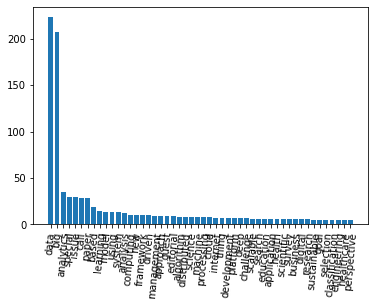

In [13]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

In [ ]:
# remove_words = ['data', 'big']
# for word in remove_words:
#     del word_count[word]

# 연도기준 그룹화

In [14]:
all_files_data_concat['doc_count'] = 0 
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count() 
summary_year #출력하여 내용 확인

,출판일,doc_count
0,2013,1
1,2014,23
2,2015,19
3,2016,25
4,2017,29
5,2018,25
6,2019,13
7,2020,26
8,2021,24
9,2022,15


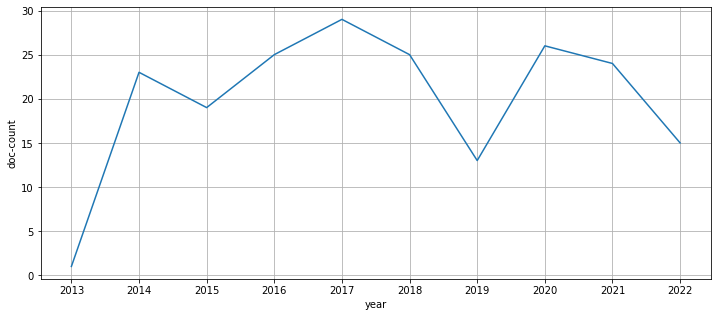

In [15]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

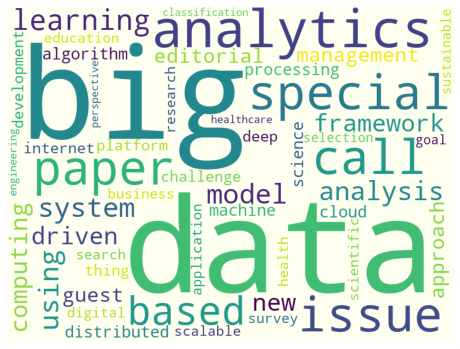

In [16]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [17]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [18]:
len(stopwords)

192

In [19]:
stopwords.update(('big','data'))

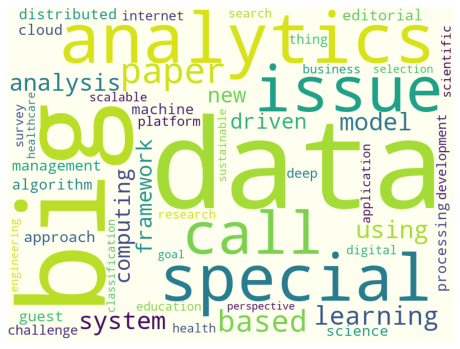

In [20]:
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [21]:
len(stopwords)

194